In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=pd.read_csv("titanic.csv")

In [3]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [4]:
titanic.drop(['sibsp','parch','embarked','class','who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)

In [5]:
titanic.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


### Visualization:

D:\Users\qwerty\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


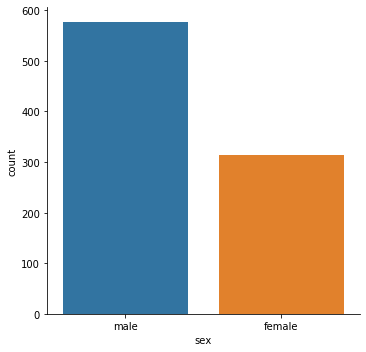

In [6]:
sns.factorplot('sex',data=titanic,kind='count')

We can say that there was more male inboard than females. Lets check how many male and female survived.

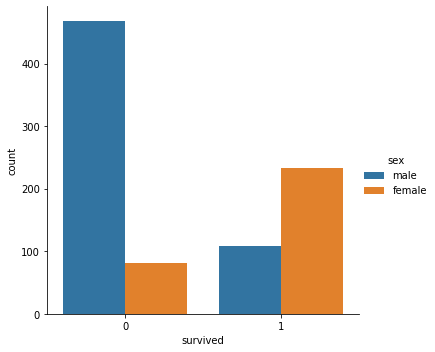

In [7]:
sns.factorplot('survived',data=titanic,hue='sex',kind='count')

Looking at the graph we can clearly say that more females have survived the shipwreck than male. 
index(0:not survived, 1: survived).

In [8]:
#Lets look how many children survived in the shipwreck, should we?
def children(p):
    
    age , gender = p
    if age <18:
        return 'child'
    else:
        return gender

titanic['person'] = titanic[['age','sex']].apply(children,axis=1)

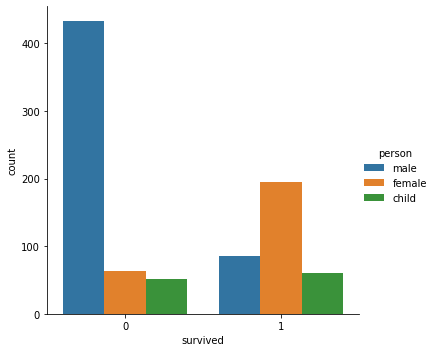

In [9]:
sns.factorplot('survived',data=titanic,hue='person',kind='count')

We can observe clearly through this data that compared to male and children, surviving rate of female was much greater. Lets now classify the data according to the Passenger class.

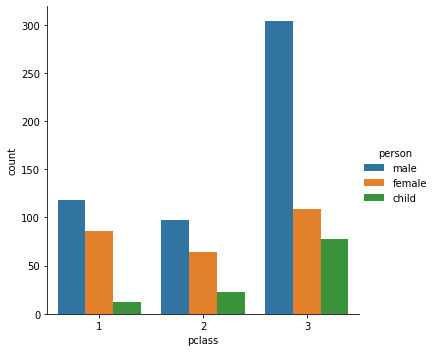

In [10]:
sns.factorplot('pclass',data=titanic,hue='person',kind='count')

We are getting a very interesting insight. Most of the passangers in titanic travelled in 3rd class. Lets check the survival rate according to passanger class.

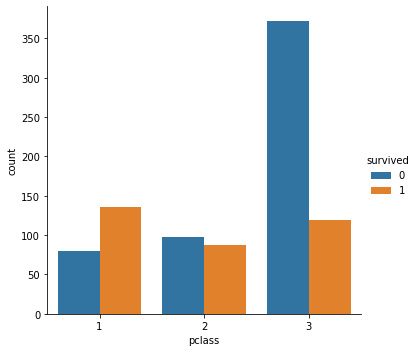

In [11]:
sns.factorplot('pclass',data=titanic,hue='survived',kind='count')

We can see most of the third class passanger did not survive.But most passangers from the first class did.

### Machine Learning

In [12]:
X = titanic.drop('survived',axis=1)
Y=titanic.survived

In [13]:
X.sex = X.sex.map({'male': 1, 'female': 2})
X.person=X.person.map({'male': 1, 'female': 2,'child':3})

In [14]:
X.isnull().sum()

pclass      0
sex         0
age       177
fare        0
person      0
dtype: int64

In [15]:
X.age = X.age.fillna(X.age.mean())#treating the missing values.

In [16]:
X.isnull().sum()

pclass    0
sex       0
age       0
fare      0
person    0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [18]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
print("Training Completed.")

Training Completed.


In [20]:
pred = model.predict(X_test)

In [22]:
data = {
    'Actual': y_test,
    'Predicted': pred,
}
df2=pd.DataFrame(data)
df2.head()

,Actual,Predicted
852,0,1
607,1,0
81,1,0
649,1,0
265,0,0


In [23]:
model.score(X_test,y_test)

0.7653631284916201